### Overview
You have five sections to complete in this Notebook:
* Part A: Load and Clean Data
* Part B Data Exploration
* Part C: Predicting Spending Levels
* Part D: Predicting Big Spenders
* Part E: Business Recommendations

In [2]:
# add all your imports here.
# YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# raise NotImplementedError()

---
# Part A: Load and Clean Data

Save your CSV data file into the same folder as this notebook.

Write Python code to load your dataset into a Pandas DataFrame called 'sales'.

In [3]:
# YOUR CODE HERE
sales = pd.read_csv('Gadget_Sales.csv')
# raise NotImplementedError()

After you have loaded the data correctly, you should have 10,000 rows. 
Run the following cells and tests to check that you have done this correctly.

In [4]:
sales.head()

,CustNum,Name,Sex,Age,State,Income,Clicks,LastSpend,Purchases,Spend
0,0,Brandon Bender,male,67,NSW,120000,709,$2488.59,8,$1615.00
1,1,Andre Mccormick,male,38,VIC,140000,630,$4295.34,14,$1927.20
2,2,Ashley Smith,female,47,NSW,50000,554,$1986.09,8,$363.30
3,3,Ann Riley,female,33,NSW,100000,309,$1532.64,10,$588.60
4,4,Timothy Chavez,male,49,NSW,140000,520,$2082.08,8,$1764.40


In [5]:
"""Check that 'sales' has the right shape and number of rows (5 points)."""
assert len(sales.columns) == 10
assert sales.columns[0] == "CustNum"
assert sales.shape == (10000, 10)

## Cleaning the Data

Some of the columns are strings, with dollar signs.  But we need to convert them to numbers (float) so that we can do calculations on them.  The next cell shows what will go wrong if we try doing calculations *before* converting them floats!

In [6]:
s2 = sales["Spend"] * 4
s2.head()

0    $1615.00$1615.00$1615.00$1615.00
1    $1927.20$1927.20$1927.20$1927.20
2        $363.30$363.30$363.30$363.30
3        $588.60$588.60$588.60$588.60
4    $1764.40$1764.40$1764.40$1764.40
Name: Spend, dtype: object

In [7]:
# Complete the following remove_dollar function 
# so that it removes any dollar signs and spaces
# and then returns the string as a number (float).
def remove_dollar(s):
    """Removes dollar signs and spaces from s.
    Returns it as a float.
    """
    # YOUR CODE HERE
    if type(s) == str:
        return float(s.replace('$','').replace(' ',''))
    else:
        return [float(s.replace('$','').replace(' ','')) for s in s]

In [8]:
"""Check that remove_dollar() removes dollars and spaces properly (5 points)."""
assert remove_dollar("12") == 12.0
assert remove_dollar("$123") == 123.0
assert remove_dollar("  $1234") == 1234.0
assert remove_dollar(" $42.3 ") == 42.3

## Clean up the Spend columns

Apply your remove_dollar function to the "Spend" column (every row), and put the cleaned-up float values into a new column of your 'sales' DataFrame called **"SpendValue"**.

Then do the same for the "LastSpend" column and put the float values into a new column called **"LastSpendValue"**.

In [9]:
# YOUR CODE HERE
sales['SpendValue'] = remove_dollar(sales.Spend)
sales['LastSpendValue'] = remove_dollar(sales.LastSpend)
# raise NotImplementedError()

In [10]:
sales.dtypes

CustNum             int64
Name               object
Sex                object
Age                 int64
State              object
Income              int64
Clicks              int64
LastSpend          object
Purchases           int64
Spend              object
SpendValue        float64
LastSpendValue    float64
dtype: object

In [11]:
# check the new SpendValue columns (5 points)
assert sales.columns.contains("SpendValue")
assert sales.columns.contains("LastSpendValue")
# check that they are floats
assert sales["SpendValue"].dtype == "float64"
assert sales["LastSpendValue"].dtype == "float64"
# check that the values are greater than zero.
assert (sales["SpendValue"] > 0.0).all()
assert (sales["LastSpendValue"] >= 0.0).all()

## Make Sex and State numeric

To use the Sex and State columns as input features for the machine learning algorithms in Scikit-Learn they must be numeric.

Use the **LabelEncoder** object from the sklearn.preprocessing package to convert the 'Sex' column into an integer column called **"SexValue"**.  

Also convert the "State" column into a integer column called **"StateValue"**. 

In [12]:
# YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder
sales['SexValue'] = LabelEncoder().fit_transform(sales.Sex)
sales['StateValue'] = LabelEncoder().fit_transform(sales.State)
# raise NotImplementedError()

In [13]:
# see if Sex has been mapped to ints properly?
cols = ["Name", "Sex", "SexValue"]
sales[cols].head()

,Name,Sex,SexValue
0,Brandon Bender,male,1
1,Andre Mccormick,male,1
2,Ashley Smith,female,0
3,Ann Riley,female,0
4,Timothy Chavez,male,1


In [14]:
# see if State has been mapped to ints properly?
cols = ["Name", "State", "StateValue"]
sales[cols].head(10)

,Name,State,StateValue
0,Brandon Bender,NSW,1
1,Andre Mccormick,VIC,6
2,Ashley Smith,NSW,1
3,Ann Riley,NSW,1
4,Timothy Chavez,NSW,1
5,John Bennett,VIC,6
6,Teresa Wise,QLD,3
7,Andrew Nelson,QLD,3
8,Jon Aguilar,NSW,1
9,Priscilla Briggs,NSW,1


In [15]:
# test the new SexValue and StateValue columns (5 points)
assert sales.columns.contains("SexValue")
assert sales.columns.contains("StateValue")
# check that they are integer
assert str(sales["SexValue"].dtype).startswith("int")   # "int32" or "int64"
assert str(sales["StateValue"].dtype).startswith("int") # "int32" or "int64"
# check that the values are greater than zero.
assert sales["SexValue"].max() == 1    # 0 and 1 only
assert sales["StateValue"].max() == 7  # 7 states in Australia

In [16]:
# Finally, let us view just the numeric columns.
numcols = ["CustNum", "SexValue", "Age", "StateValue",
           "Income", "Clicks", "Purchases", "SpendValue"]
sales[numcols].head()

,CustNum,SexValue,Age,StateValue,Income,Clicks,Purchases,SpendValue
0,0,1,67,1,120000,709,8,1615.0
1,1,1,38,6,140000,630,14,1927.2
2,2,0,47,1,50000,554,8,363.3
3,3,0,33,1,100000,309,10,588.6
4,4,1,49,1,140000,520,8,1764.4


---

# Part B Data Exploration

In this section, you will explore the data statistically and visually, to get a feel for what kinds of data you have, and how much people are spending on your web site.

## B.1 Data Inspection

Start by using the Pandas **describe()** function to analyse all the numeric columns of your 'sales' DataFrame.  Spend some time looking at this and making sure that you understand the average (mean) and range (min and max) of each column.

In [17]:
# YOUR CODE HERE
sales.describe()
# raise NotImplementedError()

,CustNum,Age,Income,Clicks,Purchases,SpendValue,LastSpendValue,SexValue,StateValue
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000
mean,4999.50000,44.388500,80260.000000,501.40390,8.45270,906.892805,2024.320991,0.50590,3.677300
std,2886.89568,16.796832,42091.918143,289.59793,4.96355,632.156911,1855.160796,0.49999,2.273561
min,0.00000,16.000000,20000.000000,0.00000,1.00000,160.200000,0.000000,0.00000,0.000000
25%,2499.75000,30.000000,40000.000000,251.00000,5.00000,438.400000,641.597500,0.00000,1.000000
50%,4999.50000,44.000000,80000.000000,502.00000,7.00000,694.625000,1447.640000,1.00000,3.000000
75%,7499.25000,59.000000,120000.000000,753.00000,11.00000,1231.237500,2877.345000,1.00000,6.000000
max,9999.00000,73.000000,160000.000000,1000.00000,24.00000,2995.000000,11676.310000,1.00000,7.000000


### Data Inspection Questions

In the next cell, write your observations about the "SpendValue" and "Purchases" columns.  For each column, say what the average value is and discuss what that means in terms of your sales to an average person.  Also discuss the min and max values.  

Based on the "SpendValue" column, explain how much your "big spenders" (the top 25% percent of your clients) are spending each year.  This will be a range of values, such as from 1000 to 2000 dollars.

Your discussion must all be in the next cell.  

Add three level-2 headings in that cell to break your discussion into topics: "Purchases column", "SpendValue column", and "Big Spenders".

### Answer:
The average value of **Age** attribute is **44.388500*. the min for this attribute is **16** and the max value of this attribute is **73**. The average value of **Income** attribute is **80260**, the min value of this attribute is **20000** and the max value of this attribute is **160000**.
## Purchase Column
The average value of **Minimum Purchase** attribute is **8.45270**, the min value of this attribute is **1** and the max value of this attribute is **24**. From these insights, it is seen that the minimum purchase that has been made by any customer from the gadget store is of 1 gadget and the maximum purchase by any customer ever made is of 24 gadgets.
 ## SpendValue Column
The average value of **Spend Value** attribute is **906.892805**, the min value of this attribute is **160.20** and the max value of this attribute is **2995**.  The minimum spend value has been spent by the customer who purchased only one gadget, on the other hand, the maximum spend value is of the customer who purchased the greatest number of gadgets from the gadget store. 
 ## Big Spenders
**1230** and **2995** is the range value for the customers who are considered as big spenders at the gadget store.


## B.2 Differences between States

We want to know where most of our customers live and whether customers from certain areas spend more or less than average.  Write some Pandas code to calculate and display the total **number of customers** in each Australian state (NSW, QLD, VIC, etc.) and their average **SpendValue**.  

Hint: you could do this by *grouping* your 'sales' table, or by *looping* through all the states, or several other ways.

In [18]:
# YOUR CODE HERE
statesgroup = sales.groupby('State').agg({'CustNum':'count','SpendValue':'mean'})
statesgroup.head()
# raise NotImplementedError()

,CustNum,SpendValue
State,,
ACT,316,896.829430
NSW,2974,894.985071
NT,77,823.362987
QLD,1709,889.928233
SA,664,909.493750


### Graphical Comparison of States

Now *graph* your results, so that you can see them visually.

NOTE: since the states in Australia have very different populations, you should also calculate and graph the number of customers *relative* to the population of each state (you can use Google to find populations of each state).

So you should show at least the following three graphs:
* the absolute number of customers in each state;
* the number of customers in each state as a percentage of the population of that state;
* the average SpendValue of customers in each state (dollars/customer).

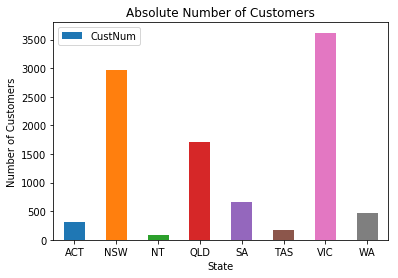

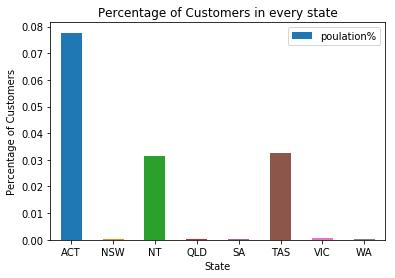

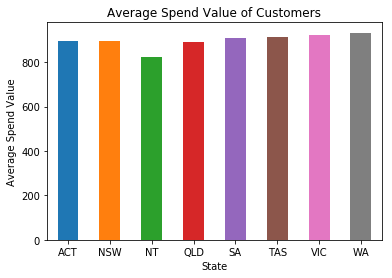

In [19]:
# YOUR CODE HERE

# Population of states on google
popState = np.array([406692,789000000,245786,497000000,172000000,520830,627000000,267000000])

# the absolute number of customers in each state
statesgroup.plot(y='CustNum', kind= 'bar')
plt.xticks(rotation=0)
plt.ylabel('Number of Customers')
plt.title('Absolute Number of Customers')
plt.show()

# the number of customers in each state as a percentage of the population of that state
statesgroup['poulation%'] = statesgroup.CustNum / popState * 100
 
statesgroup.plot(y='poulation%', kind= 'bar')
plt.xticks(rotation=0)
plt.ylabel('Percentage of Customers')
plt.title('Percentage of Customers in every state')
plt.show()

# the average SpendValue of customers in each state (dollars/customer)
statesgroup.plot(y = 'SpendValue', kind='bar')
plt.xticks(rotation=0)
plt.ylabel('Average Spend Value')
plt.title('Average Spend Value of Customers')
plt.legend().remove()
plt.show()

# raise NotImplementedError()

### Question:
Discuss these graphs and explain your conclusions.

For example, are there *significant* differences in the average spend in different states?  Are our customer spread evenly across Australia, or concentrated in particular areas? 

Write your answer in the next cell, and give reasons for your conclusions.

### Answer:

**316** customers are associated to the gadget store from **Australian Capital Territory**. **2974** customers are associated to the gadget store from **New South Wales**. **77** customers are associated to the gadget store from **Northern Territory**. **1709** customers are associated to the gadget store from **Queensland**. **664** customers are associated to the gadget store from **South Australia **. **169** customers are associated to the gadget store from **Tasmania**. **3620** customers are associated to the gadget store from **Victoria**. **471** customers are associated to the gadget store from **Western Australia**.
**0.0777%** percent people are associated to the gadget store out of **406692** i.e. the total population of **Australian Capital Territory**. **0.0004 %** percent people are associated to the gadget store out of **789000000** i.e. the total population of **New South Wales**. **0.0313%** percent people are associated to the gadget store out of **245786** i.e. the total population of **Northern Territory**. **0.0003%** percent people are associated to the gadget store out of **497000000** i.e. the total population of **Queensland**. **0.0004%** percent people are associated to the gadget store out of **172000000** i.e. the total population of ** South Australia **. **0.0324%** percent people are associated to the gadget store out of **520830** i.e. the total population of **Tasmania**. **0.0006%** percent people are associated to the gadget store out of **627000000** i.e. the total population of **Victoria**. **0.0002%** percent people are associated to the gadget store out of **267000000** i.e. the total population of **Western Australia**. 
The customers from most of the cities are spending amount equivalent to the average spend values. Whereas the customers from the state of **Northern Territory** spend average amount value lesser than their average spend values, on the other hand the customers from **Western Australia** are spending more amount than their average spends.


---

# Part C: Predicting Spending Levels

Using the LinearRegression function from the Scikit-Learn library (**sklearn**), build a machine learning model for predicting the expected **SpendValue** for a customer.  

Measure the performance of your model using 10-fold cross-validation with a test set size of 20% and print various measures of how accurate your predictions are.

In [20]:
sales.head()

,CustNum,Name,Sex,Age,State,Income,Clicks,LastSpend,Purchases,Spend,SpendValue,LastSpendValue,SexValue,StateValue
0,0,Brandon Bender,male,67,NSW,120000,709,$2488.59,8,$1615.00,1615.0,2488.59,1,1
1,1,Andre Mccormick,male,38,VIC,140000,630,$4295.34,14,$1927.20,1927.2,4295.34,1,6
2,2,Ashley Smith,female,47,NSW,50000,554,$1986.09,8,$363.30,363.3,1986.09,0,1
3,3,Ann Riley,female,33,NSW,100000,309,$1532.64,10,$588.60,588.6,1532.64,0,1
4,4,Timothy Chavez,male,49,NSW,140000,520,$2082.08,8,$1764.40,1764.4,2082.08,1,1


In [21]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

X_train,X_test,y_train,y_test=train_test_split(sales[['Income','Purchases','SexValue']],sales[['SpendValue']],test_size=0.2,random_state=121)
reg  = LinearRegression().fit(X_train,y_train)
pred = reg.predict(X_test)

acc = cross_val_score(estimator = reg ,X = X_train,y = y_train,cv = 10)
print('Accuracies for 10cv: ',acc)
# raise NotImplementedError()

Accuracies for 10cv:  [0.84790796 0.84369033 0.85962807 0.84717124 0.84227225 0.84460036
 0.85104337 0.84690129 0.85336703 0.84468429]


### Analysis of Results

Print out the linear regression coefficients for all the input features, so that you can see which ones are more significant and which ones are unimportant.  

Hint 1: Since the scale of the input features is so different (0-1 for sex, 0-160000 for income, etc) multiply the linear regression coefficients by the average value of the corresponding column, to see how many dollars that column contributes to the total predicated-spend answer.

Hint 2: Could you graph the predicted and actual spendvalues of the test data, to visually see how good the linear regression results are?

Coefficient value of Income 	is 0.009981699024789322
Coefficient value of Purchases 	is 0.137887439924898
Coefficient value of SexValue 	is 802.3603559720451


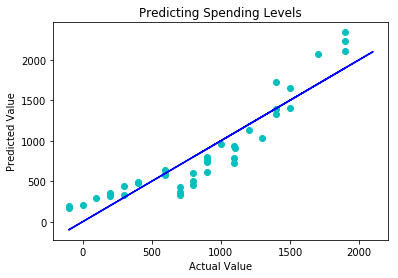

In [22]:
# YOUR CODE HERE
# coefficients 
for i,j in zip(['Income','Purchases','SexValue'],reg.coef_[0]):
    print(f'Coefficient value of {i} \tis {j}')

plt.scatter(pred[-40:], y_test.SpendValue.iloc[-40:], color = 'c')
plt.plot(pred, reg.predict(X_test), color = 'blue')
plt.title('Predicting Spending Levels')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()    
    
# raise NotImplementedError()

### Discussion:

Discuss your conclusions about this linear regression model (in the next cell).  Which input features are most significant?

### Answer:
Y = m * x + c 
> the equation used to calculate the regression where y acts as the sink to store the regression value, m is the variable used to hold the slope value of the regression value, x is the variable regarding which the regression is calculated and c comprises of a constant.

---
# Part D: Predicting Big Spenders

In this section we want to build some machine learning models predict if a new customer is likely to be a big spender or not.  This will be a binary outcome (yes or no), so we can use machine learning *classification* algorithms.

Remember that our definition of 'Big-Spender' is that it is a client whose annual spending level (**SpendValue**) is in the top 25% of our clients.  So the exact dollar cutoff for big spenders will be different for each student, as each of you are working for a different company and are using a different dataset.

Choose two classification algorithms.  Use each one to build and then evaluate a 'big-spender' prediction model.

In [23]:
# YOUR CODE HERE

# Finding Big Spenders
bs = sales.sort_values('SpendValue',ascending=False).reset_index()
value = bs.SpendValue[(len(bs.SpendValue)*0.25)]
sales['BigSpender'] = [1 if i > value else 0 for i in sales.SpendValue]

X_train,X_test,y_train,y_test=train_test_split(sales[['Income','Purchases','SpendValue']],sales[['BigSpender']],test_size=0.2,random_state=121)
X_train.head()

from sklearn.svm import SVC
clfSVC = SVC(gamma='auto')
clfSVC.fit(X_train, y_train)
predSVM = clfSVC.predict(X_test)
print('Accuracy Score for SVM: ',clfSVC.score(X_test, y_test))


from sklearn.neighbors import KNeighborsClassifier
clfKNN = KNeighborsClassifier(n_neighbors = 2)
clfKNN.fit(X_train, y_train)
predKNN = clfKNN.predict(X_test)

print('Accuracy Score for KNN: ',clfKNN.score(X_test, y_test))

Accuracy Score for SVM:  0.8555
Accuracy Score for KNN:  1.0


### Discussion:

Discuss your conclusions about your two classification models (in the next cell).

Which classification algorithm gives the more accurate results? 

How accurate are the results from your best classifier?

### Answer:
KNN and SVM models are used for the classification of the big spenders for the gadget store. The accuracy of SVM model is lesser than that of the KNN model as the SVM only provides 85% correct answers whereas the KNN provides 90% correct answers. 

---
# Part E: Business Recommendations

The company you are doing this analysis for wants some recommendations from you about how to find new customers who are likely to be big spenders.  They are wondering if they should focus their advertising on a particular gender?  Or people in a given state, such as Victoria, or NSW?  Or aim at demographic groups who have high income level or medium income levels?  Or other strategies?  What recommendations will you give them?  

Write about 100 words describing your conclusions from your analysis, and your recommendations for the best strategy for attracting new big-spender customers.

## Recommendations:
From the insights gathered above, it is concluded that amounts, the males are spending on gadgets are much higher as compared to females. The amount that males are spending on the gadgets are much higher i.e.  2000 to 3000 which majorly falls into the category of big spenders. Whereas, the females are spending amounts between the range of 1000 to 2000, which is lesser than the males. The big spenders should be given membership cards along with benefits associated to them.